In [5]:
import numpy as np
from scipy import special
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

import coding
import overshadowing_ber

import datetime

from matplotlib.colors import LogNorm

sns.set_theme()

In [6]:
# Global variables
EaEvdBs = np.arange(-30, 30, 1)
EvN0dBs = np.arange(-5, 30, 1)
EvN0dB_min = -1.6 # shannon limit
N = int(1E3) # number of samples per run

qam_modulation_schemes = [16, 64, 256]
psk_modulation_schemes = [2, 4, 8, 16]

In [7]:
# Custom functions

# TODO: check
def calculate_combined_signal_to_noise(EaEvdB, EvN0dB):
    EaN0dB = EaEvdB + EvN0dB
    return 10 * np.log10(10**(EvN0dB/10) + 10**(EaN0dB/10))

In [8]:
# Gaussian attacks against various modulation schemes, no receiver noise

qam_bers = { 
    M: [
        overshadowing_ber.run_qam_simulation(
            lambda x: overshadowing_ber.gaussian_jam_offset(x, EaEvdB, M),
            N,
            M
        )
        for EaEvdB in EaEvdBs
    ]
    for M in qam_modulation_schemes
}

psk_bers = { 
    M: [
        overshadowing_ber.run_simulation(
            lambda x: overshadowing_ber.gaussian_jam_offset(x, EaEvdB, M),
            N,
            M
        )
        for EaEvdB in EaEvdBs
    ]
    for M in psk_modulation_schemes
}

In [9]:
# Gaussian attacks against various modulation schemes, maximum receiver noise

EbN0dBs = calculate_combined_signal_to_noise(EaEvdBs, EvN0dB_min)

qam_bers_max_noise = { 
    M: [
        overshadowing_ber.run_qam_simulation(
            lambda x: overshadowing_ber.gaussian_offset(x, EbN0dB, M),
            N,
            M
        )
        for EbN0dB in EbN0dBs
    ]
    for M in qam_modulation_schemes
}

psk_bers_max_noise = { 
    M: [
        overshadowing_ber.run_simulation(
            lambda x: overshadowing_ber.gaussian_offset(x, EbN0dB, M),
            N,
            M
        )
        for EbN0dB in EbN0dBs
    ]
    for M in psk_modulation_schemes
}

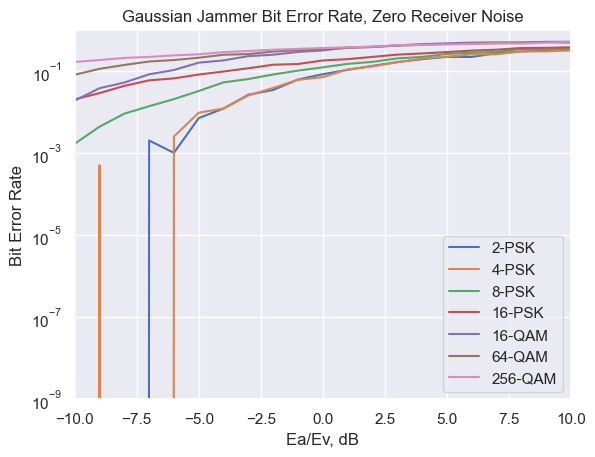

In [10]:
# Graph Gaussian attack bit error rate against Ea/Ev (dB), zero noise

fig, axs = plt.subplots(1, 1, subplot_kw={"yscale": "log"})
plt.setp(axs, ylim=[1E-9, 1])
plt.setp(axs, xlim=[-10, 10])

axs.title.set_text("Gaussian Jammer Bit Error Rate, Zero Receiver Noise")

for M, bers in psk_bers.items():
    axs.plot(EaEvdBs, bers, label=f"{M}-PSK")

for M, bers in qam_bers.items():
    axs.plot(EaEvdBs, bers, label=f"{M}-QAM")

axs.legend()
plt.xlabel('Ea/Ev, dB')
plt.ylabel('Bit Error Rate')
plt.show()